# Machine Learning Engineer Nanodegree
## Capstone Project
Trenton Potgieter
January 31$^{st}$, 2017
## I. Definition
### Project Overview
As one gets older, an increasingly difficult awareness of our parent's mortality becomes a serious concern. Personally, my parents are both in their early 70's and according to a study[^1] done in __2015__ by the __American Heart Association__, around __370,000__ people die of heart attacks each year and is the __No. 1__ cause of in the United States. In __2014__, around __356,500__ people experienced heart attacks out of the hospital. Of that  amount  only __12%__ survived due to emergency medical services intervention. Personally, I would not like my parents to be one the __88%__ who suffered from a fatal heart attack and didn't survive  due to the fact that there was no intervention by emergency medical services. According to the study, there is a prevalence of almost *third* of the population at risk of *Heart Disease* leading to a *Heart Attack* as one approaches __80+__ years of age. Having no personal experience in the Coronary Field of Medical research, it would be difficult for me to diagnose any potential warning signs, but with the advent of wearable technology, the mechanisms are in place to potentially aid in this early warning and detection of heart attacks. The majority of wearable technology today has the built-in ability to monitor heart rates. Therefore in this project, I proposed that this information can be uploaded or sent to a __data ingestion pipeline__ that this capable of interpreting, analyzing and detecting an the patterns that could be classified as symptoms of a heart attack. 

Additionally, since one of the potential symptoms is the increase in heart rates. There are a number of potential factors that influence the increase in heart rate, but there are well published guidelines[^2] that can be used to determine anomalous patterns. If these anomalies occur, the the __data ingestion pipeline__ could proactively determine if a heart attack is about to *or* has occurred and alert the appropriate emergency medical response. Thus proactively preventing a fatal or near-fatal heart attack. As am added benefit, the __pipeline__ mechanism can be used to monitor patients who are in *Cardiac Rehabilitation*[^3].

The dataset used for this Project was obtained as part of a *Proof of Concept (POC)* project in the __Dell IoT Solutions Lab__ [^6] in Santa Clara, California, where a PPG [^4] Pulse sensor was used to measure Heart Rate Variability (HRV) [^7]  reading, similar to those found on current wearables like the __Fitbit Charge 2__ [^8]. The scope of the original POC is simply to verify if the data can be extracted and filtered to detect peaks in the PPG signal for a one minute data segment. Four separate test subjects (between the ages of 68 and 76) were subjected to different stimuli to induce *stress* and *relaxing* scenarios. The one minute observations (__300__ in total) are stored in a `data.csv` file. Each observation has __8__ specific features of the PPG waveform, namely:

1. __Time__ $\rightarrow$ Time Stamp of the observation.
2. __AVRR__ $\rightarrow$ Average "normal" hert beats.
3. __AVHR__ $\\rightarrow$ Average total heart beats.
4. __SDRR__ $\rightarrow$ Standard Deviation of "normal" heart beats.
5. __RMSRR__ $\rightarrow$ Root Mean Squared of "normal" hear beats.
6. __ppNN50__ $\rightarrow$ Proportion of NN50 (50 successive "normal" heart beats) divided by total number of "normal" heart beats.
7. __ppNN20__ $\rightarrow$ Proportion of NN20 (20 successive "normal" heart beats) divided by total number of "normal" heart beats.
8. __Label__ $\rightarrow$ Stressed or Relaxed.

### Problem Statement
For this Project, I propose creating a classification pipeline that ingests heart-rate signal data (from a simulated wearable monitor) and classifies whether the subject is in a stressful situation that could lead to *Cardiac Unrest*. Additionally, in order to prevent a "cry-wolf" scenario or *false-positives*, the pipeline employs a consensus mechanism where three classifiers must all agree on the classification.

![Figure 1: Training/Testing Pipeline](images/Pipeline.jpg)

To address the scope of this project however, I propose training three separate supervised machine learning models by applying the following methodology to create the pipeline. Once created, the pipeline (see Figure 1.) will be used to test and deploy the models on a sample unseen data from the test subjects and hence predict their stress levels by following these steps:

1. Collect already filtered PPG [^4] signal data with symbolic peaks (and other features) have been collected for a one-minute time segment. Each one-minute time segment is considered an observation labeled with the class `relax` or `stress`. Separate the input data into two separate repositories. One for the observations and one for the labeled output.
2. Apply __normalization__ and/or __standardization__ techniques to  pre-process the data.
3. Define three separate models to evaluate the the data.
>__Note:__ There are two concerns with the above dataset. The *first* is that fact that it has only __300__ observations, thus making it a relatively small data set. The *second* is the fact that there are significantly more observations labeled as `relaxed` then there are those labeled as `stressed`. To address this *imbalance* and verify the accuracy of the predictions, I propose leveraging __k-fold cross validation__ to split the the data into a **60%** training set and a **30%** testing set. This process will be executed **10** times (10 Folds). The advantage of this technique is that it can treat each test set uniquely, thus addressing the fact that the data set used is relatively small, and provide an average prediction result across the 10 folds. This process will be used for each of the three models.

4. Apply the models and measure their performance on a completely __separate__ and as yet __unseen__ dataset. This dataset is exactly the same as the training dataset except it is has no `State` label.

The final classification is Implementing a Weighted Majority Rule Ensemble Classifier [^5] based on the probability of the time segment observation belonging to either class, using the following:
$$
\hat{y} = \arg\\max_{i}\sum^{m}_{j=1}w_{j}p_{ij},
$$
where $wj$ is the weight that can be assigned to the $j^{th}$ classifier.

Once created, the pipeline (see Section 7) will be used to test and deploy the models on a sample unseen data from the new test subjects and hence predict their stress levels.

### Metrics
Since the success criteria of the project is based on the overall __probability__ of the time segment observation belonging to either class (`stressed` or `relaxed`), each individual model as well as the overall consensus pipeline will be evaluated using the following metrics:

1. __Confusion Matrix:__ $\rightarrow$ A tabular breakdown of predictions into a table showing the predictions that are correctly classified as well and the predictions are made incorrectly.
2. __Recall:__ $\rightarrow$ The measure of completeness of the classifier. In other words, if the label is `stressed`, how well does the model predict that the subject is `stressed`. Basically, the ratio of the number of observations the model can correctly recall, to the number of all correct observations.
$$
Recall = \frac{True Positive}{True Positive + False Negative}
$$

3. __Precision:__ $\rightarrow$ The number of positive predictions divided by the total positive class values. So, precision is the ratio of a number of observations the model can correctly predict to a number of all observations the model can recall. In other words, it is how precise the model's recall is.
$$
Precision = \frac{True Positive}{True Positive + False Positive}
$$

4. __F1 Score:__ $\rightarrow$ If the models are good at *Recall*, that doesn't necessarily mean that they are good at *Precision*. The *F1 Score* is the balanced average of the the two. This balanced *F1 Score* is necessary as an overal performance metric due to the fact that if there is a misclassification that the subject is under stress, but isn't, then the emergency medical services are called out unnecessarily. If however, there is a misclassification that the subject isn't stressed, but actually is, then this could result in a fatality. Having the *F1 Score* will allow us to allocate more weight to *Precision* or *Recall*.
$$
F1 \ Score = \frac{2 \cdot Precision}{Precision + Recall}
$$

## II. Analysis
### Data Exploration

In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#warnings.filterwarnings("ignore", category=DeprecationWarning)
df = pd.read_csv("data/data.csv", header = None)
df.columns = ["Time", "AVHR", "AVRR", "SDRR", "RMSSD", "ppNN50", "ppNN20", "State"]
#df.head()
one_hot = pd.get_dummies(df['State'])
df = df.drop('State', 1)
df = df.join(one_hot)
y = df[['stress', 'relax']]

X = df.drop(['stress', 'relax' ], 1)
print X.shape
print y.shape

(300, 7)
(300, 2)


### Exploratory Visualization

ValueError: x and y must be the same size

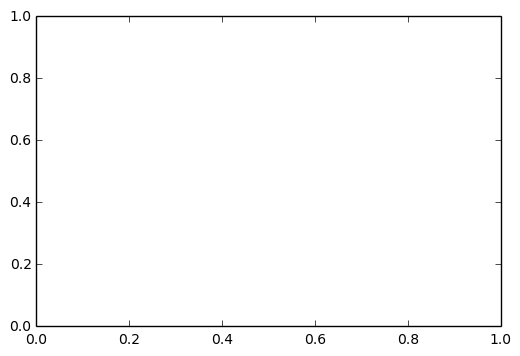

In [9]:
plt.scatter(X, y);

### Algorithms and Techniques

### Benchmark

## III. Methodology
### Data Preprocessing

### Implementation

### Refinement

## IV. Results
### Model Evaluation and Validation

### Justification

## V. Conclusion
### Free-Form Validation

### Reflection

### Improvement


~~It is the objective of this project to re-apply the resulting pipeline to a set of new test subjects and hopefully provide a viable prototype that can preemptively warn of potential heart attacks. Based on this final classification, additional future actions can be implemented that are currently outside the scope of this project.~~



## VI. References

[^1]: (https://www.heart.org/idc/groups/ahamah-public/@wcm/@sop/@smd/documents/downloadable/ucm_480086.pdf)
[^2]: (http://www.heart.org/HEARTORG/HealthyLiving/PhysicalActivity/FitnessBasics/Target-Heart-Rates_UCM_434341_Article.jsp#.WHEiXbGZNE4)
[^3]: (https://www.nhlbi.nih.gov/health/health-topics/topics/rehab)
[^4]: (https://en.wikipedia.org/wiki/Photoplethysmogram)
[^5]: (http://scikit-learn.org/stable/modules/ensemble.html#weighted-average-probabilities-soft-voting)
[^6]: (https://www.dell.com/en-us/work/learn/internet-of-things-labs)
[^7]: (http://www.myithlete.com/what-is-hrv/)
[^8]: (https://www.fitbit.com/charge2)